# Python Libraries for Data Analysis and Visualization

We will import the following libraries:

1. **pandas** (`pd`) – For data manipulation and analysis (working with DataFrames).  
2. **numpy** (`np`) – For numerical operations and array computations.  
3. **sklearn.preprocessing** – For preprocessing data (e.g., scaling, encoding).  
4. **matplotlib.pyplot** (`plt`) – For creating static, interactive, and animated visualizations.  
5. **seaborn** (`sns`) – For statistical data visualization, built on top of Matplotlib.  
6. **warnings** – To manage warning messages. Here we will ignore them for a cleaner output.

In [441]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

We are loading the dataset **HeartDisease.csv** into a pandas DataFrame named `disease_df`.

- `pd.read_csv()` is a pandas function used to read a CSV file.
- The resulting `disease_df` will allow us to perform data analysis and preprocessing easily.

In [442]:
disease_df = pd.read_csv("HeartDisease.csv")

# Previewing the Dataset

We use `disease_df.head()` to display the **first 5 rows** of the dataset.  
This helps us get a quick look at:

- Column names
- Data types
- Sample values
- Any immediate issues like missing values

In [443]:
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Dataset Columns Overview

The Heart Disease dataset contains the following features:

1. **male** – Gender of the patient (1 = male, 0 = female)  
2. **age** – Age of the patient in years  
3. **education** – Education level (categorical)  
4. **currentSmoker** – Whether the patient currently smokes (1 = yes, 0 = no)  
5. **cigsPerDay** – Number of cigarettes smoked per day  
6. **BPMeds** – Whether the patient is on blood pressure medication (1 = yes, 0 = no)  
7. **prevalentStroke** – History of stroke (1 = yes, 0 = no)  
8. **prevalentHyp** – History of hypertension (1 = yes, 0 = no)  
9. **diabetes** – Diabetes status (1 = yes, 0 = no)  
10. **totChol** – Total cholesterol level  
11. **sysBP** – Systolic blood pressure  
12. **diaBP** – Diastolic blood pressure  
13. **BMI** – Body Mass Index  
14. **heartRate** – Heart rate (beats per minute)  
15. **glucose** – Glucose level  
16. **TenYearCHD** – Target variable: 10-year risk of Coronary Heart Disease (1 = yes, 0 = no)

In [444]:
disease_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [445]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## 3. Summary Statistics

The `describe()` function provides key statistical insights for all numeric columns: 5 point summary


In [446]:
disease_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [447]:
disease_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Dealing with Missing values

In [448]:
disease_df = disease_df.dropna(subset=['heartRate', 'BMI'])

In [449]:
# Fill missing BPMeds with the most frequent value (0 or 1)
disease_df['BPMeds'].fillna(disease_df['BPMeds'].mode()[0], inplace=True)

In [450]:
disease_df['totChol'].fillna(disease_df['totChol'].median(), inplace=True)
disease_df['glucose'].fillna(disease_df['glucose'].median(), inplace=True)  # cautious due to high missing %

In [451]:
disease_df.loc[disease_df['currentSmoker']==0, 'cigsPerDay'] = 0
disease_df['cigsPerDay'].fillna(disease_df['cigsPerDay'].median(), inplace=True)

In [452]:
disease_df['education'].fillna(disease_df['education'].mode()[0], inplace=True)

In [453]:
disease_df.shape

(4220, 16)

In [454]:
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [455]:
disease_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [456]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3587
1     633
Name: count, dtype: int64


### Imbalance dataset need to resample

# EDA

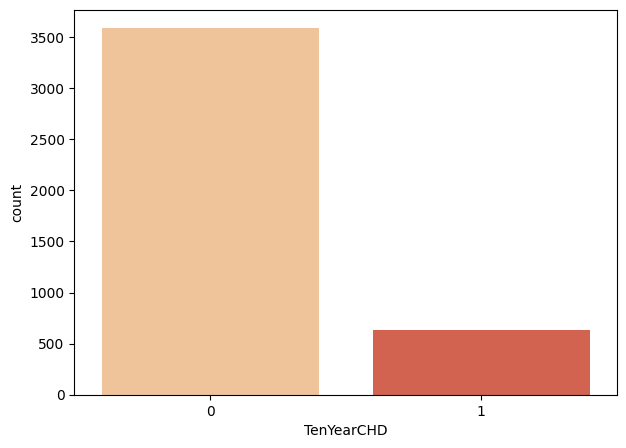

In [457]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="OrRd" )
plt.show()

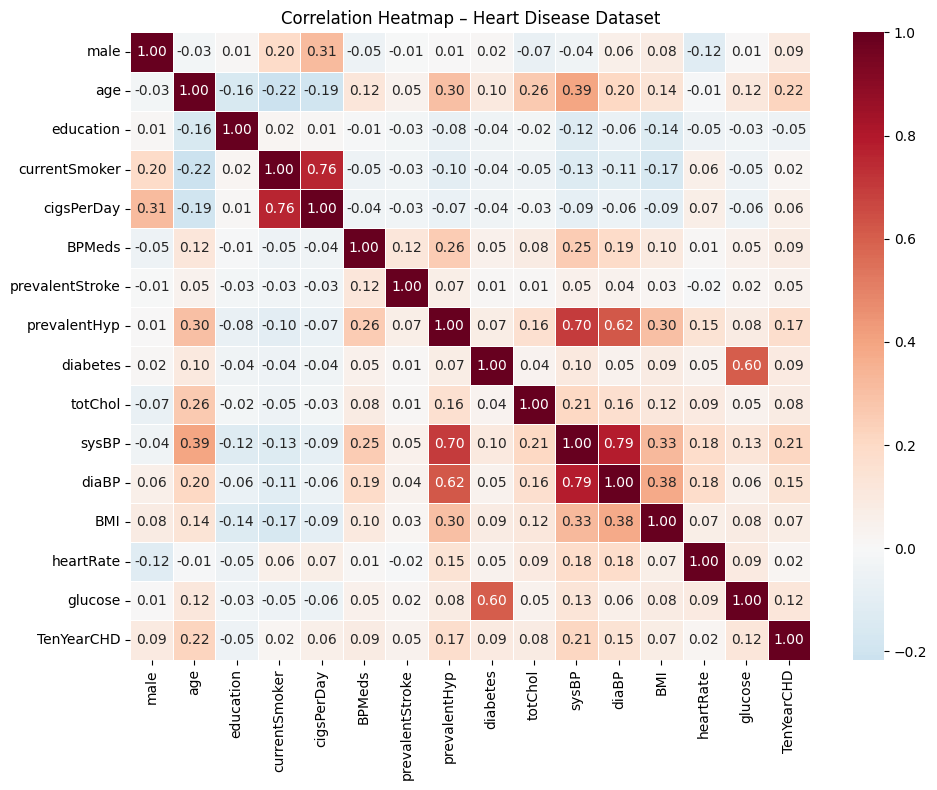

In [458]:
corr = disease_df.corr(numeric_only=True)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0, linewidths=0.5)
plt.title('Correlation Heatmap – Heart Disease Dataset')
plt.tight_layout()
plt.show()

# Feature Engineering

# Taking out irrevelant features

In [459]:
# Compute correlation of all features with the target
correlations = disease_df.corr()['TenYearCHD'].sort_values(ascending=False)
print(correlations)

TenYearCHD         1.000000
age                0.221720
sysBP              0.213151
prevalentHyp       0.174528
diaBP              0.145001
glucose            0.119430
diabetes           0.092663
male               0.091022
BPMeds             0.085017
totChol            0.084925
BMI                0.074875
cigsPerDay         0.060636
prevalentStroke    0.050027
heartRate          0.023739
currentSmoker      0.021171
education         -0.050785
Name: TenYearCHD, dtype: float64


# Taking out columns correlation score close to zero or negative

In [460]:
# List of features to drop based on very low correlation with target
features_to_drop = ['heartRate', 'currentSmoker', 'education']

# Create a new DataFrame with only relevant features
disease_df = disease_df.drop(columns=features_to_drop)

# Optional: separate features and target for modeling
X = disease_df.drop('TenYearCHD', axis=1)
y = disease_df['TenYearCHD']

# Check the cleaned dataset
print(disease_df.head())
print("\nColumns retained:", X.columns.tolist())

   male  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0     1   39         0.0     0.0                0             0         0   
1     0   46         0.0     0.0                0             0         0   
2     1   48        20.0     0.0                0             0         0   
3     0   61        30.0     0.0                0             1         0   
4     0   46        23.0     0.0                0             0         0   

   totChol  sysBP  diaBP    BMI  glucose  TenYearCHD  
0    195.0  106.0   70.0  26.97     77.0           0  
1    250.0  121.0   81.0  28.73     76.0           0  
2    245.0  127.5   80.0  25.34     70.0           0  
3    225.0  150.0   95.0  28.58    103.0           1  
4    285.0  130.0   84.0  23.10     85.0           0  

Columns retained: ['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']


# Combine existing features (interactions)

Sometimes the interaction between variables matters more than the variables themselves:

age × sysBP → older people with high BP are at exponentially higher risk.

BMI × glucose → high BMI + high glucose = higher metabolic risk.

In [461]:
disease_df['age_sysBP'] = disease_df['age'] * disease_df['sysBP']
disease_df['BMI_glucose'] = disease_df['BMI'] * disease_df['glucose']

# Transform features

Log / sqrt transformations: handle skewed distributions.

Binning / discretization: categorize continuous variables into risk categories.

In [462]:
disease_df['age_group'] = pd.cut(disease_df['age'], bins=[30,40,50,60,70], labels=[1,2,3,4])

# Ratios / percentages

Sometimes ratios capture health risk better:

In [463]:
# Create new features based on ratios
disease_df['pulse_pressure'] = disease_df['sysBP'] / disease_df['diaBP']
disease_df['glucose_BMI_ratio'] = disease_df['glucose'] / disease_df['BMI']

# Optional: check the new features
disease_df[['pulse_pressure', 'glucose_BMI_ratio']].head()

,pulse_pressure,glucose_BMI_ratio
0,1.514286,2.855024
1,1.493827,2.645318
2,1.593750,2.762431
3,1.578947,3.603919
4,1.547619,3.679654


## Derived risk features

Count comorbidities: sum of prevalentHyp, diabetes, prevalentStroke → “total risk burden”.

In [464]:
disease_df['risk_burden'] = disease_df[['prevalentHyp','diabetes','prevalentStroke']].sum(axis=1)

In [465]:
disease_df.head(1000)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,age_sysBP,BMI_glucose,age_group,pulse_pressure,glucose_BMI_ratio,risk_burden
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0,4134.0,2076.69,1,1.514286,2.855024,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0,5566.0,2183.48,2,1.493827,2.645318,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0,6120.0,1773.80,2,1.593750,2.762431,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1,9150.0,2943.74,4,1.578947,3.603919,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0,5980.0,1963.50,2,1.547619,3.679654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0,37,0.0,0.0,0,0,0,159.0,112.0,69.0,26.98,78.0,0,4144.0,2104.44,1,1.623188,2.891030,0
1000,0,41,0.0,0.0,0,0,0,168.0,102.0,64.0,23.64,75.0,0,4182.0,1773.00,2,1.593750,3.172589,0
1001,1,46,0.0,0.0,0,0,0,216.0,124.0,85.0,29.91,103.0,0,5704.0,3080.73,2,1.458824,3.443664,0
1002,1,60,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,85.0,0,10020.0,1955.85,3,1.590476,3.694046,1


In [466]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3587
1     633
Name: count, dtype: int64


## Model Training

### Separate features and target

In [467]:
X = disease_df.drop(columns=['TenYearCHD', 'age_group'], axis=1)  # all input features
y = disease_df['TenYearCHD']               # target variable

# feature scaling

In [468]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','glucose',
                    'age_sysBP','BMI_glucose','pulse_pressure','glucose_BMI_ratio','risk_burden']

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Train/Test Split

Always split before resampling.

Stratify to maintain class balance in train and test sets.

In [469]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance (Resampling)

dataset is imbalanced: many healthy (0) vs fewer diseased (1).

Use SMOTE (oversampling minority class) on the training set only.

In [470]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on resampled data

In [471]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)  # no need for class_weight now, SMOTE balanced it
logreg.fit(X_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [475]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Predict on test set
y_pred = logreg.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6492890995260664

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76       717
           1       0.25      0.67      0.36       127

    accuracy                           0.65       844
   macro avg       0.58      0.66      0.56       844
weighted avg       0.82      0.65      0.70       844

ROC-AUC Score: 0.7360392712417223
Confusion Matrix:
 [[463 254]
 [ 42  85]]


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       717
           1       0.25      0.67      0.36       127

    accuracy                           0.65       844
   macro avg       0.58      0.66      0.56       844
weighted avg       0.82      0.65      0.70       844



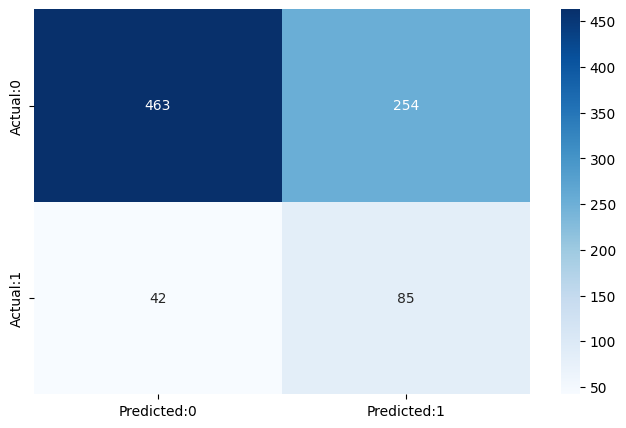

In [479]:
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")

plt.show()